# Import Data

In [1]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1LmBOD_F4_pNpfdGVtWknnf9X1ZWj22bn")
df.head()

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7d66c67f-0d11-4ef9-895c-d865ef11fe40,523b8706,Ghibli-style village at sunset,2965,1361,417,Reddit,11.11,81,2808,1024x1024,92,Yes,No,2025-03-11,Absolutely stunning! Love the details. 🎨 #5729
2,d7978afd-3932-4cce-9a21-5f9bf2bc1f64,0e02592a,A lone traveler exploring an enchanted ruin,4727,655,785,Instagram,5.56,41,1800,2048x2048,61,No,No,2025-03-06,Is this AI or hand-painted? Incredible! #8001
3,cb34636a-a15c-4b15-999c-759dbb8896fe,9ed78a42,Spirited Away-style bustling market street,1629,1954,212,TikTok,12.45,88,479,2048x2048,76,No,No,2025-03-23,Is this AI or hand-painted? Incredible! #5620
4,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...


# Analyzing Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               500 non-null    object 
 1   user_id                500 non-null    object 
 2   prompt                 500 non-null    object 
 3   likes                  500 non-null    int64  
 4   shares                 500 non-null    int64  
 5   comments               500 non-null    int64  
 6   platform               500 non-null    object 
 7   generation_time        500 non-null    float64
 8   gpu_usage              500 non-null    int64  
 9   file_size_kb           500 non-null    int64  
 10  resolution             500 non-null    object 
 11  style_accuracy_score   500 non-null    int64  
 12  is_hand_edited         500 non-null    object 
 13  ethical_concerns_flag  500 non-null    object 
 14  creation_date          500 non-null    object 
 15  top_co

In [3]:
df.nunique()

,0
image_id,500
user_id,500
prompt,12
likes,475
shares,442
comments,402
platform,4
generation_time,413
gpu_usage,61
file_size_kb,478


In [4]:
df.describe()

,likes,shares,comments,generation_time,gpu_usage,file_size_kb,style_accuracy_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2601.262000,1040.182000,506.872000,8.317780,61.124000,2511.822000,74.626000
std,1429.433498,562.668738,283.384066,3.903103,18.151131,1390.178578,14.679001
min,105.000000,13.000000,5.000000,1.540000,30.000000,101.000000,50.000000
25%,1343.500000,587.750000,276.750000,5.027500,45.000000,1374.750000,62.000000
50%,2566.500000,1092.000000,518.000000,8.380000,63.000000,2498.000000,74.000000
75%,3913.250000,1502.000000,744.250000,11.540000,77.000000,3729.000000,87.250000
max,4944.000000,1999.000000,998.000000,14.990000,90.000000,4973.000000,100.000000


In [5]:
print("Has Null", [col for col in df.columns if df[col].hasnans])
print("Is Unique", [col for col in df.columns if df[col].is_unique])

Has Null []
Is Unique ['image_id', 'user_id', 'top_comment']


In [6]:
df['hand_edited'] = df['is_hand_edited'].map({'Yes': True, 'No': False})
df['ethical_flag'] = df['ethical_concerns_flag'].map({'Yes': True, 'No': False})
df.loc[:, 'hand_edited':'ethical_flag'].corr(numeric_only=False)

,hand_edited,ethical_flag
hand_edited,1.000000,-0.044029
ethical_flag,-0.044029,1.000000


In [7]:
df.groupby(['hand_edited', 'ethical_flag']).size().reset_index(name='counts')

,hand_edited,ethical_flag,counts
0,False,False,124
1,False,True,126
2,True,False,135
3,True,True,115


# Data Cleaning & Preparation

In [8]:
# Create a new column for weighted popularity score
# df['popularity_score'] = df['likes'] + (df['shares'] * 2) + (df['comments'] * 3)
df['popularity_score'] = round(((df['likes'] * .3) + (df['shares'] * 3) + (df['comments'] * 10)) / 1e4, 2)

df.corr(numeric_only=True).style.background_gradient(cmap='RdYlGn')

,likes,shares,comments,generation_time,gpu_usage,file_size_kb,style_accuracy_score,hand_edited,ethical_flag,popularity_score
likes,1.000000,-0.029318,-0.013297,-0.041881,-0.005609,-0.016744,0.019640,-0.027511,-0.076837,0.102476
shares,-0.029318,1.000000,-0.006400,-0.003688,0.015755,-0.020748,0.011279,0.028240,0.019647,0.501023
comments,-0.013297,-0.006400,1.000000,0.068484,-0.054742,0.012197,-0.102865,0.033373,0.055279,0.852527
generation_time,-0.041881,-0.003688,0.068484,1.000000,0.092766,-0.057717,-0.101120,0.040270,0.128946,0.051404
gpu_usage,-0.005609,0.015755,-0.054742,0.092766,1.000000,-0.003873,0.011885,0.032868,-0.063988,-0.039774
file_size_kb,-0.016744,-0.020748,0.012197,-0.057717,-0.003873,1.000000,-0.011579,0.018060,-0.015284,-0.002480
style_accuracy_score,0.019640,0.011279,-0.102865,-0.101120,0.011885,-0.011579,1.000000,-0.003137,-0.028077,-0.079696
hand_edited,-0.027511,0.028240,0.033373,0.040270,0.032868,0.018060,-0.003137,1.000000,-0.044029,0.040023
ethical_flag,-0.076837,0.019647,0.055279,0.128946,-0.063988,-0.015284,-0.028077,-0.044029,1.000000,0.048102
popularity_score,0.102476,0.501023,0.852527,0.051404,-0.039774,-0.002480,-0.079696,0.040023,0.048102,1.000000


In [9]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   image_id               500 non-null    object        
 1   user_id                500 non-null    object        
 2   prompt                 500 non-null    object        
 3   likes                  500 non-null    int64         
 4   shares                 500 non-null    int64         
 5   comments               500 non-null    int64         
 6   platform               500 non-null    object        
 7   generation_time        500 non-null    float64       
 8   gpu_usage              500 non-null    int64         
 9   file_size_kb           500 non-null    int64         
 10  resolution             500 non-null    object        
 11  style_accuracy_score   500 non-null    int64         
 12  is_hand_edited         500 non-null    object        
 13  ethic

# Question 1
- what is the avg gpu usage based on each platform?
- when was the first date & last date of a ghibili image pulished on each platform?
- how much pixel (resolution) is published on each platform?


In [10]:
# What is the average GPU usage based on each platform?
# When was the first date & last date a Ghibli image was published on each platform?
df.groupby('platform').agg(first_date=('creation_date', 'min'), last_date=('creation_date', 'max'), avg_gpu=('gpu_usage', 'mean'))

,first_date,last_date,avg_gpu
platform,,,
Instagram,2025-03-01,2025-03-31,62.239316
Reddit,2025-03-01,2025-03-31,62.060345
TikTok,2025-03-01,2025-03-31,58.192308
Twitter,2025-03-01,2025-03-31,62.160584


In [11]:
# How much pixel (resolution) is published on each platform?
resolution_counts = df.groupby(['platform', 'resolution']).size().unstack(sort=False)
resolution_counts

resolution,1024x1024,2048x2048,512x512
platform,,,
Instagram,29,43,45
Reddit,51,34,31
TikTok,42,42,46
Twitter,36,54,47


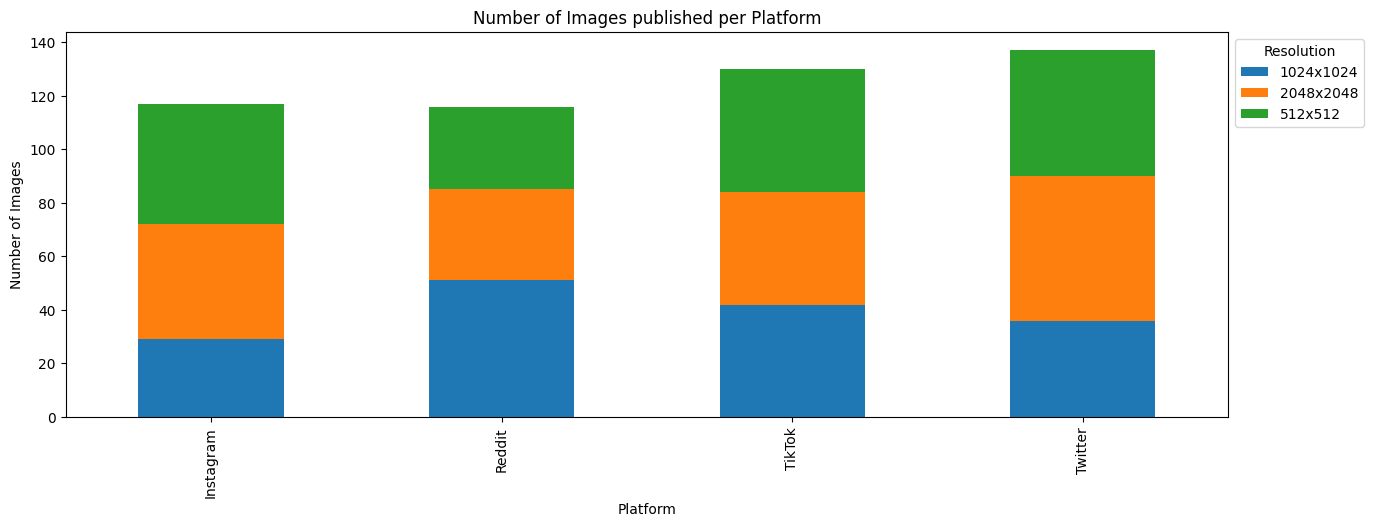

In [12]:
import matplotlib.pyplot as plt

resolution_counts = df.groupby(['platform', 'resolution']).size().unstack(sort=False)
resolution_counts.plot(kind='bar', stacked=True, figsize=(15, 5),
  title='Number of Images published per Platform',
  xlabel='Platform',
  ylabel='Number of Images',
)
plt.legend(title='Resolution', bbox_to_anchor=(1, 1))
plt.show()

### Improvement

In [13]:
# Need to do this to sort based on most published
s_sort = df.groupby('platform').size().sort_values(ascending=False)
# s_sort

df[['pixel_w', 'pixel_h']] = df['resolution'].str.split('x', expand=True)
df['pixel_w'] = df['pixel_w'].astype(int)
df['pixel_h'] = df['pixel_h'].astype(int)
df['total_pixels'] = df['pixel_w'] * df['pixel_h']
df.drop(columns=['pixel_w', 'pixel_h'], inplace=True)

# Group by and sort by 2nd level which is total_pixels
resolution_counts = df.groupby(['platform', 'resolution', 'total_pixels']).size().sort_index(level=2, ascending=True)
# Don't need total_pixels after sorting
resolution_counts = resolution_counts.droplevel(level=2)
# re-index based on s_sort so that plaform is sorted based on high to low
resolution_counts = resolution_counts.reindex(index=s_sort.index, level=0)
# unstack for be converted to chart
resolution_counts = resolution_counts.unstack(sort=False)

resolution_counts

resolution,512x512,1024x1024,2048x2048
platform,,,
Twitter,47,36,54
TikTok,46,42,42
Instagram,45,29,43
Reddit,31,51,34


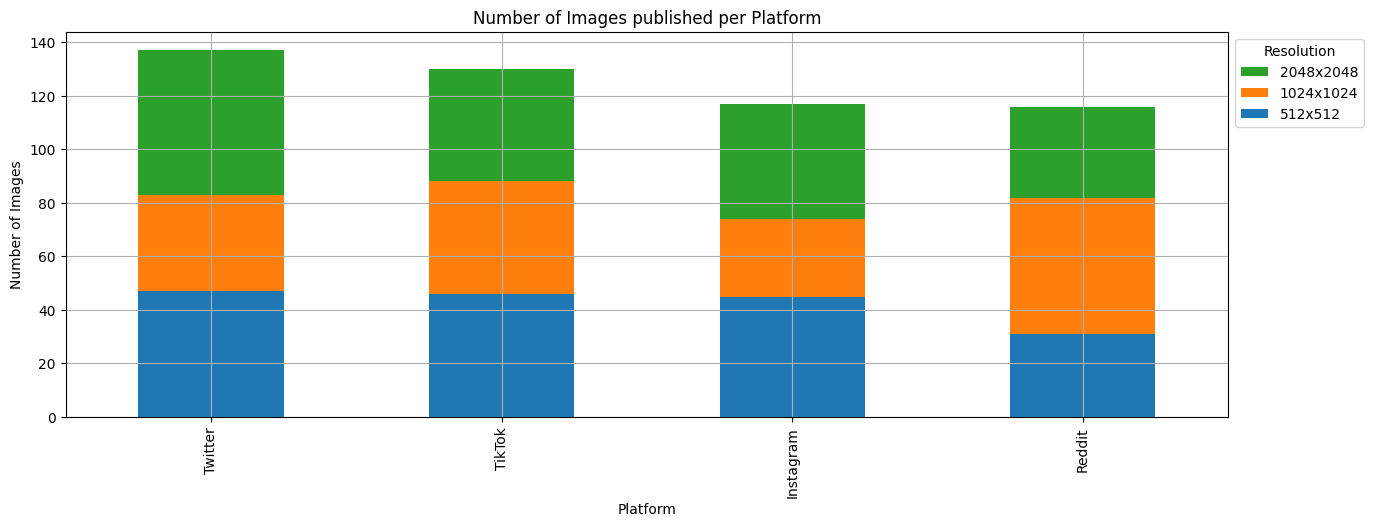

In [14]:
resolution_counts.plot(kind='bar', stacked=True, figsize=(15, 5), grid=True,
  title='Number of Images published per Platform',
  xlabel='Platform',
  ylabel='Number of Images',
)
plt.legend(title='Resolution', bbox_to_anchor=(1, 1), reverse=True)
plt.show()

# Question 2
**How "hand edit" or "image resolution" affect popularity?**

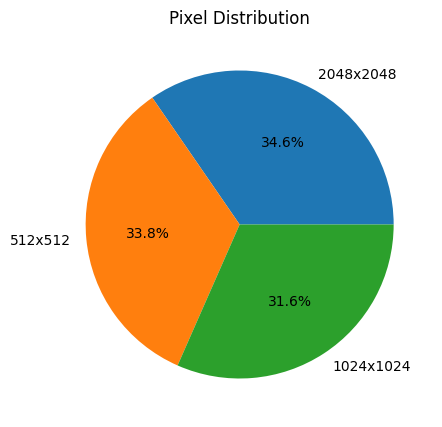

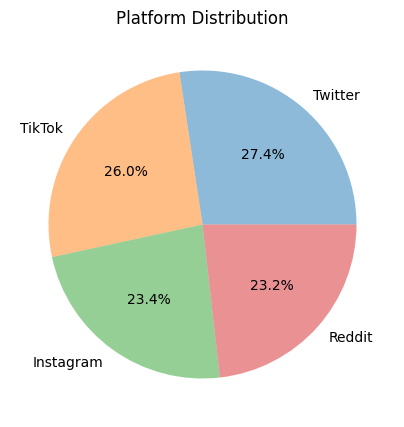

In [15]:
df['resolution'].value_counts().plot(kind="pie", title='Pixel Distribution', ylabel='', figsize=(5, 5), autopct="%1.1f%%")
plt.show()
df['platform'].value_counts().plot(kind="pie", title='Platform Distribution', ylabel='', figsize=(5, 5), autopct="%1.1f%%", wedgeprops={"alpha": 0.5})
plt.show()

## Image Resolution vs Popularity

In [16]:
# Need to do this to sort based on most published
s_sort = df.groupby('platform')['popularity_score'].sum().sort_values(ascending=False)

resolution_popularity = df.groupby(['platform', 'resolution', 'total_pixels'])['popularity_score'].sum().sort_index(level=2, ascending=True).droplevel(level=2).reindex(index=s_sort.index, level=0).unstack(sort=False)
resolution_popularity

resolution,512x512,1024x1024,2048x2048
platform,,,
TikTok,42.68,38.04,40.91
Twitter,41.57,30.18,47.46
Reddit,27.74,47.67,31.73
Instagram,40.20,23.43,36.98


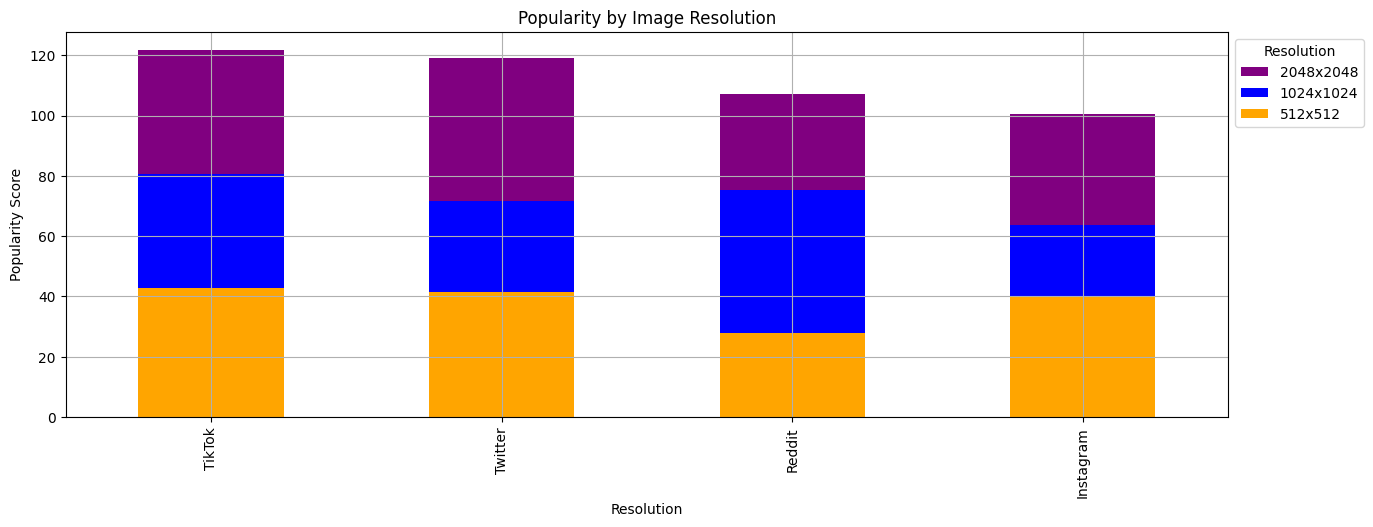

In [17]:
resolution_popularity.plot(
    kind='bar', stacked=True, figsize=(15, 5), grid=True,
    title='Popularity by Image Resolution',
    ylabel='Popularity Score',
    xlabel='Resolution',
    color=['orange', 'blue', 'purple']
    # color=['lightgray', 'darkgray', 'black']
)
plt.legend(title='Resolution', bbox_to_anchor=(1, 1), reverse=True)
plt.show()

## Hand Edit vs Popularity

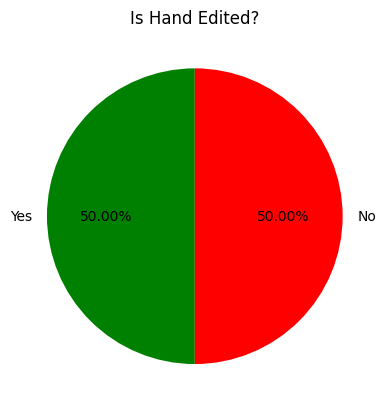

In [18]:
df['is_hand_edited'].value_counts().plot(kind="pie", title='Is Hand Edited?', ylabel='', startangle=90, autopct="%1.2f%%", colors=["green", "red"])
plt.show()

In [19]:
# Group by hand editing and calculate average popularity
hand_edit_popularity = df.groupby(['platform', 'is_hand_edited'])['popularity_score'].sum().unstack()
hand_edit_popularity

is_hand_edited,No,Yes
platform,,
Instagram,50.47,50.14
Reddit,54.23,52.91
TikTok,56.78,64.85
Twitter,59.51,59.70


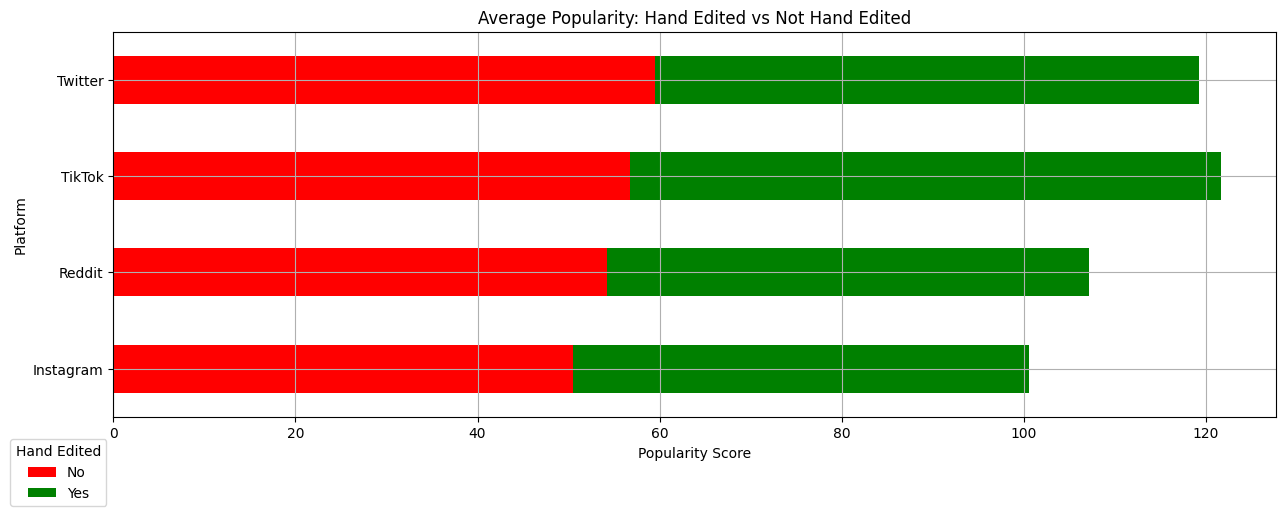

In [20]:
hand_edit_popularity.plot(
    kind='barh', stacked=True, grid=True, figsize=(15, 5),
    title='Average Popularity: Hand Edited vs Not Hand Edited',
    ylabel='Platform',
    xlabel='Popularity Score',
    color=['red', 'green']
)
plt.legend(title='Hand Edited', loc='lower right', bbox_to_anchor=(0, -0.25))
plt.show()

# Question 3
Let's compare gpu_usage to "generation time" or "file size". do they have a linear relation or could it be something else?

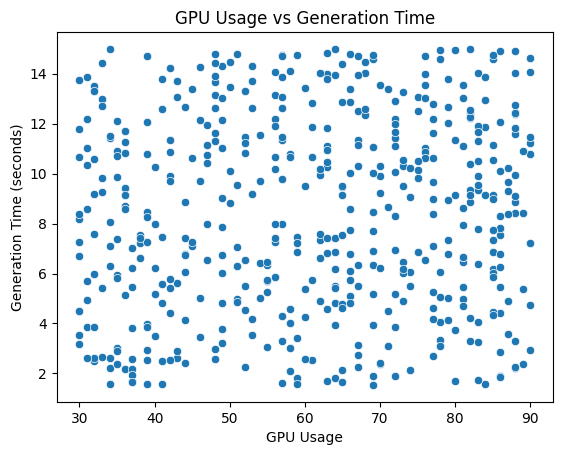

In [21]:
import seaborn as sns

# GPU Usage vs Generation Time
sns.scatterplot(x='gpu_usage', y='generation_time', data=df)
plt.title('GPU Usage vs Generation Time')
plt.xlabel('GPU Usage')
plt.ylabel('Generation Time (seconds)')
plt.show()

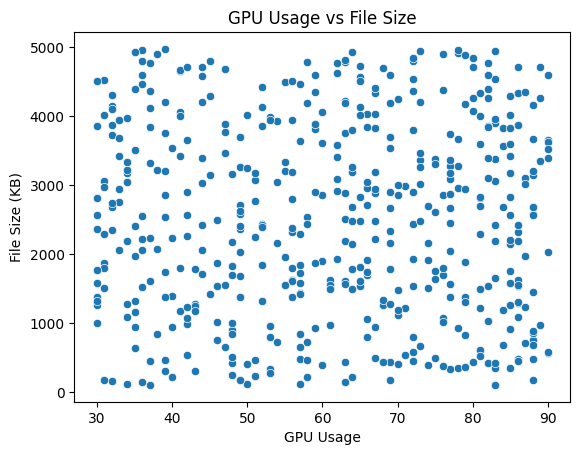

In [22]:
# GPU Usage vs File Size
sns.scatterplot(x='gpu_usage', y='file_size_kb', data=df)
plt.title('GPU Usage vs File Size')
plt.xlabel('GPU Usage')
plt.ylabel('File Size (KB)')
plt.show()